In [1]:
import sys
sys.path.append("../")
from matplotlib import pyplot as plt
from matplotlib.axes import Axes
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from axessettings import AxesSetting, linear_sim

In [2]:
def read_spectrum(filename, num_peak = 10, peak_min = 0.05, peak_width = 5):
    data = pd.read_csv(filename, sep='\t', header = None, skiprows=14, names=['wavelength', 'intensity'])
    data_sorted = data.sort_values(by="intensity", ascending=False)
    peak = []
    peak_min_real = data_sorted.iloc[0]["intensity"] * peak_min
    for i in range(num_peak):
        if (len(data_sorted) == 0):
            break
        nth_peak = data_sorted.iloc[0]
        if nth_peak["intensity"] < peak_min_real:
            break
        peak.append(nth_peak.index)
        data_sorted = data_sorted[(data_sorted["wavelength"] < nth_peak["wavelength"]-peak_width/2) | (data_sorted["wavelength"] > nth_peak["wavelength"]+peak_width/2)]
    return data, peak

In [3]:
data, peak = read_spectrum("spectrum_measure/s1_cen_50_11.txt")
print(peak)
print(data.loc[peak])

[Index(['wavelength', 'intensity'], dtype='object'), Index(['wavelength', 'intensity'], dtype='object'), Index(['wavelength', 'intensity'], dtype='object'), Index(['wavelength', 'intensity'], dtype='object'), Index(['wavelength', 'intensity'], dtype='object'), Index(['wavelength', 'intensity'], dtype='object'), Index(['wavelength', 'intensity'], dtype='object')]


KeyError: "None of [Index([('wavelength', 'intensity'), ('wavelength', 'intensity'),\n       ('wavelength', 'intensity'), ('wavelength', 'intensity'),\n       ('wavelength', 'intensity'), ('wavelength', 'intensity'),\n       ('wavelength', 'intensity')],\n      dtype='object')] are in the [index]"

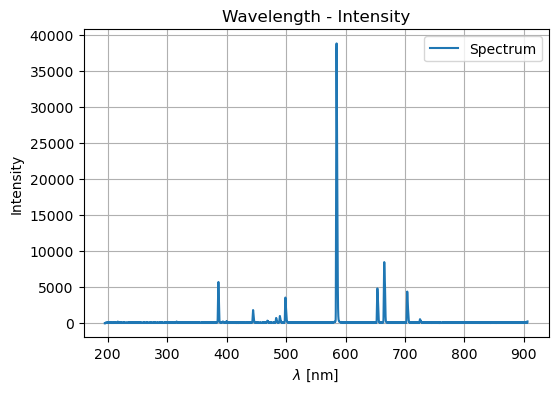

In [ ]:
axessetting = AxesSetting(legend=True, xlabel="$\lambda$ [nm]", ylabel="Intensity", grid="both", title="Wavelength - Intensity")
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.plot(data['wavelength'], data['intensity'], label="Spectrum")
axessetting.apply_axes(ax)